In [ ]:
!pip install pyinputplus

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=15c567ad3389c5351568f67891040bd0960b4a27d50d5d0b45170255b4263a5d
  Stored in directory: /root/.cache/pip/wheels/a3/6b/89/3bec14288af8e0729d088fb41a785e583d49e772f2529c7676
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16226 sha256=c96a19b0990f74d6b527927c9a6aeca930ac613517ccdc4f9f6b0025e254d5cd
  Stored in directory: /root/.cache/pip/wheels/fc/40/7a/4d3b2dc2e80b4b3bbda89eec94fcefd6c8bd1101cc7bb89554
  Created wheel for stdiomask: filename=stdiomask


🔥 Welcome to WeatherWise 🌈 (Offline Mode) 🔥
Enter your city (any input works): Using mock weather data for 'Moka'.

Please select one of the following:
1. Ask a weather question
2. View temperature chart
3. View rain chart
4. Exit


<ipython-input-2-f15d9179e1fd>:66: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


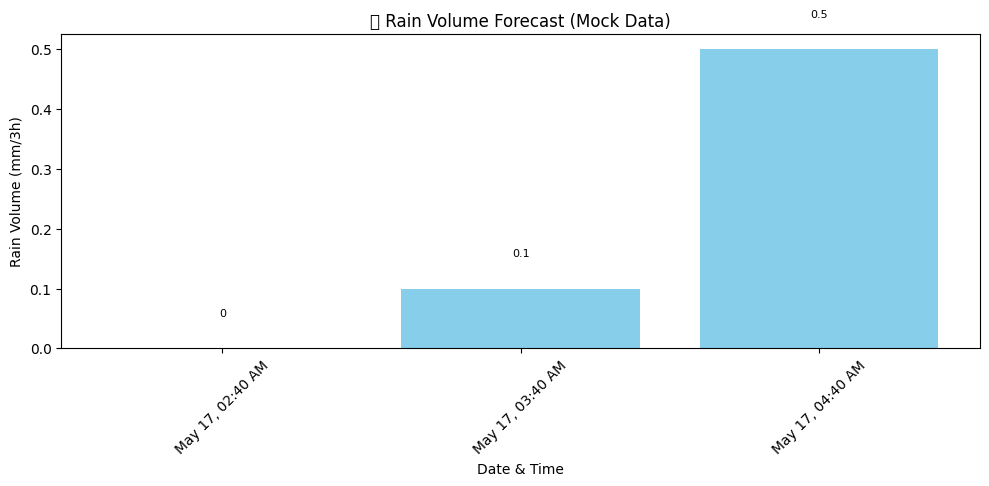

Please select one of the following:
1. Ask a weather question
2. View temperature chart
3. View rain chart
4. Exit


<ipython-input-2-f15d9179e1fd>:47: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


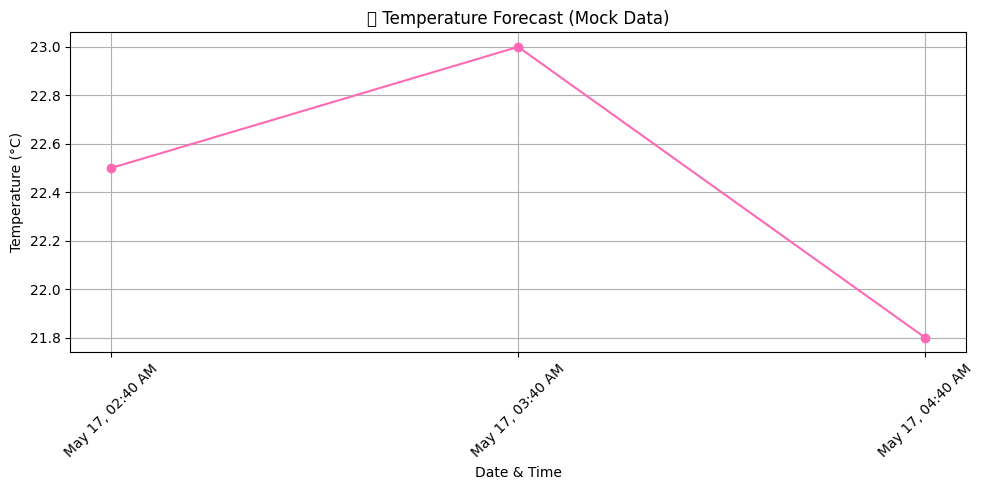

Please select one of the following:
1. Ask a weather question
2. View temperature chart
3. View rain chart
4. Exit
'is it going to rain today' is not a valid choice.
Please select one of the following:
1. Ask a weather question
2. View temperature chart
3. View rain chart
4. Exit


In [ ]:
import matplotlib.pyplot as plt
import datetime
import pyinputplus as pyip

# 🌞 MOCK WEATHER DATA 🌞
mock_weather_data = {
    'list': [
        {
            'dt': 1684291200,
            'main': {'temp': 22.5},
            'weather': [{'description': 'clear sky'}],
            'wind': {'speed': 3.5},
            'rain': {'3h': 0}
        },
        {
            'dt': 1684294800,
            'main': {'temp': 23.0},
            'weather': [{'description': 'few clouds'}],
            'wind': {'speed': 3.8},
            'rain': {'3h': 0.1}
        },
        {
            'dt': 1684298400,
            'main': {'temp': 21.8},
            'weather': [{'description': 'light rain'}],
            'wind': {'speed': 4.2},
            'rain': {'3h': 0.5}
        },
    ]
}

# 📈 VISUALISATION FUNCTIONS 📈
def create_temperature_visualisation(weather_data):
    timestamps = []
    temps = []
    for entry in weather_data['list']:
        timestamps.append(datetime.datetime.fromtimestamp(entry['dt']).strftime('%b %d, %I:%M %p'))
        temps.append(entry['main']['temp'])

    plt.figure(figsize=(10,5))
    plt.plot(timestamps, temps, color='hotpink', marker='o')
    plt.title("🌡️ Temperature Forecast (Mock Data)")
    plt.xlabel("Date & Time")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def create_precipitation_visualisation(weather_data):
    timestamps = []
    rain_chances = []
    for entry in weather_data['list']:
        timestamps.append(datetime.datetime.fromtimestamp(entry['dt']).strftime('%b %d, %I:%M %p'))
        rain = entry.get('rain', {}).get('3h', 0)
        rain_chances.append(rain)

    plt.figure(figsize=(10,5))
    plt.bar(timestamps, rain_chances, color='skyblue')
    for i, val in enumerate(rain_chances):
        plt.text(i, val + 0.05, str(val), ha='center', va='bottom', fontsize=8)
    plt.title("🌧️ Rain Volume Forecast (Mock Data)")
    plt.xlabel("Date & Time")
    plt.ylabel("Rain Volume (mm/3h)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 🧠 NLP FUNCTIONS 🧠
def parse_weather_question(question):
    question = question.lower()
    rain_keywords = {"rain", "precipitation", "wet"}
    temp_keywords = {"temperature", "hot", "cold", "warm", "chilly"}
    wind_keywords = {"wind", "breeze", "gust"}

    if any(word in question for word in rain_keywords):
        return {"attribute": "rain"}
    elif any(word in question for word in temp_keywords):
        return {"attribute": "temperature"}
    elif any(word in question for word in wind_keywords):
        return {"attribute": "wind"}
    else:
        return {"attribute": "general"}

def generate_weather_response(parsed_question, weather_data):
    current = weather_data['list'][0]
    desc = current['weather'][0]['description']
    temp = current['main']['temp']
    wind = current['wind']['speed']
    rain = current.get('rain', {}).get('3h', 0)

    attr = parsed_question["attribute"]
    if attr == "rain":
        return f"Rainfall over the next 3 hours: {rain} mm ☔"
    elif attr == "temperature":
        return f"It's currently {temp}°C with {desc} 🌤️"
    elif attr == "wind":
        return f"Wind speed is {wind} m/s 💨"
    else:
        return f"The weather is {desc} with a temp of {temp}°C and wind speed of {wind} m/s."

# 🧭 USER INTERFACE 🧭
def weather_menu():
    print("\n" + "="*40)
    print("🔥 Welcome to WeatherWise 🌈 (Offline Mode) 🔥")
    print("="*40)

    location = pyip.inputStr("Enter your city (any input works): ")
    print(f"Using mock weather data for '{location}'.\n")

    while True:
        choice = pyip.inputMenu([
            "Ask a weather question",
            "View temperature chart",
            "View rain chart",
            "Exit"
        ], numbered=True)

        if choice == "Ask a weather question":
            while True:
                q = pyip.inputStr("Ask your question (or type 'back' to return to the menu): ")
                if q.lower() == 'back':
                    break
                parsed = parse_weather_question(q)
                response = generate_weather_response(parsed, mock_weather_data)
                print(f"\n🤖 WeatherBot: {response}")

        elif choice == "View temperature chart":
            create_temperature_visualisation(mock_weather_data)

        elif choice == "View rain chart":
            create_precipitation_visualisation(mock_weather_data)

        else:
            print("\n✨ Stay weather-wise, stay fly! Bye Elisa 💫")
            break

# 🏁 MAIN EXECUTION 🏁
if __name__ == "__main__":
    weather_menu()
